In [35]:
################# testing version ##########################

import matplotlib.image as mpimg 
from matplotlib import pyplot as plt
import numpy as np
class Map:
    def __init__(self):
        self.hw = mpimg.imread('hw.jpg', format = "jpg").copy()
        self.vw = mpimg.imread('vw.jpg', format = "jpg").copy()
        self.darkness = mpimg.imread('darkness.jpg', format = "jpg").copy()
        self.floor = mpimg.imread('floor.jpg', format = "jpg").copy()
        #self.floor = mpimg.imread('character.jpg', format = "jpg").copy()
        self.Map = mpimg.imread('blank.jpg', format = "jpg").copy()
        self.len_floor, self.wid_floor, self.pixels_floor = self.floor.shape
        self.len_hw, self.wid_hw, self.pixels_hw = self.hw.shape
        self.len_vw, self.wid_vw, self.pixels_vw = self.vw.shape
        visiableIndex = {}
        wallIndex = []
        
        for i in range(24):
            for j in range(24):
                self.Map[i*self.len_floor:(i+1)*self.len_floor,j*self.wid_floor:(j+1)*self.wid_floor] = self.floor
                visiableIndex[(i,j)] = False
                
        for i in range(2):
            self.Map[(0)*self.len_hw+600:(1)*self.len_hw+600,(3*i)*self.wid_hw+400:(3*i+1)*self.wid_hw+400] = self.hw
            self.Map[(0)*self.len_hw+4200:(1)*self.len_hw+4200,(3*i)*self.wid_hw+400:(3*i+1)*self.wid_hw+400] = self.hw
            
        self.Map[(0)*self.len_vw+800:(1)*self.len_vw+800,(0)*self.wid_vw+200:(1)*self.wid_vw+200] = self.vw
        self.Map[(0)*self.len_vw+800:(1)*self.len_vw+800,(0)*self.wid_vw+4400:(1)*self.wid_vw+4400] = self.vw
        self.Map[(0)*self.len_vw+3200:(1)*self.len_vw+3200,(0)*self.wid_vw+200:(1)*self.wid_vw+200] = self.vw
        self.Map[(0)*self.len_vw+3200:(1)*self.len_vw+3200,(0)*self.wid_vw+4400:(1)*self.wid_vw+4400] = self.vw
        
        for i in range(2):
            self.Map[(0)*self.len_hw+1600:(1)*self.len_hw+1600,(2*i)*self.wid_hw+1000:(2*i+1)*self.wid_hw+1000] = self.hw
            self.Map[(0)*self.len_hw+3200:(1)*self.len_hw+3200,(2*i)*self.wid_hw+1000:(2*i+1)*self.wid_hw+1000] = self.hw
            
        self.Map[(0)*self.len_vw+2000:(1)*self.len_vw+2000,(0)*self.wid_vw+600:(1)*self.wid_vw+600] = self.vw
        self.Map[(0)*self.len_vw+2000:(1)*self.len_vw+2000,(0)*self.wid_vw+4000:(1)*self.wid_vw+4000] = self.vw
        
        for i in range(3):
            self.Map[(i)*self.len_vw+800+200*i:(i+1)*self.len_vw+800+200*i,(0)*self.wid_vw+2400:(1)*self.wid_vw+2400] = self.vw
            
            
        self.realMap = self.Map.copy()

        
        
        #for i in range(24):
            #for j in range(24):
                #self.Map[i*self.len_floor:(i+1)*self.len_floor,j*self.wid_floor:(j+1)*self.wid_floor] = self.darkness

    def printMap(self):
        fig, ax = plt.subplots(1,figsize=(10,10))
        plt.imshow(self.Map)
        
    def updateVisiableMap(self):
        for i in range(24):
            for j in range(24):
                if visiableIndex[(i,j)]:
                    self.Map[i*self.len_floor:(i+1)*self.len_floor,
                             j*self.wid_floor:(j+1)*self.wid_floor] = self.realMap[i*self.len_floor:(i+1)*self.len_floor,
                                                                                   j*self.wid_floor:(j+1)*self.wid_floor]
    
    def Create_Monster(self,Monster):
                
        self.Map[Monster.x*200:(Monster.x + 1)*200,
                 Monster.y*200:(Monster.y + 1)*200] = Monster.pic()

    def Create_character(self,character):
        
        self.Map[character.x*200:(character.x + 1)*200,
                 character.y*200:(character.y + 1)*200] = character.pic()
#######################################################################################################3
#####################################################################################################3

class Monster:

    def __init__(self, x_col, y_col, name, HP = 100, attack = 3):
        self.pic_monster = mpimg.imread('pic_monster.jpg', format = "jpg").copy()
        self.pic_goodie = mpimg.imread('pic_goodie.jpg', format = "jpg").copy()      
        self.len_pic_monster, self.wid_pic_monster, self.pixels_pic_goodie = self.pic_monster.shape
        self.len_pic_goodie, self.wid_pic_goodie, self.pixels_pic_goodie = self.pic_goodie.shape
        self.x = x_col
        self.y = y_col
        self.HP = HP
        self.attack = attack
        self.name = name
    
    def pic(self):
        if self.HP<=0:
            return self.pic_goodie
        else:
            return self.pic_monster
    
    def length(self):
        if self.HP<=0:
            return self.len_pic_goodie
        else:
            return self.len_pic_monster
        
    def width(self):
        if self.HP<=0:
            return self.wid_pic_goodie
        else:
            return self.wid_pic_monster
    
    def attack(self):
        return self.attack
    
    def BeAttacked(self,AttackFromCharacter):
        self.attack = self.attack - AttackFromCharacter
    
    def HP(self):
        return self.HP
    
    def name(self):
        return self.name
    
    def x(self):
        return self.x
    
    def y(self):
        return self.y

###########################################################################################
class weapon:
    def __init__(self,weapon_name,strength):
        self.weapon_name = weapon
        self.strength = strength
        

class character:
    def __init__(self, name, weapon, x_col = 0, y_col = 0, HP = 100,attack = 5):
        self.name = name
        self.pic_character = mpimg.imread('character.jpg', format = "jpg").copy()
        self.weapon = weapon
        self.HP = HP
        self.attack = attack
        self.x = x_col
        self.y=y_col
    def show_status(self):
        print("Your Status")
        print("Attack = ",self.attack)
        print("HP = ", self.HP)
    def __del__(self):
        return(self.name," You Died!")
    
    def pic(self):
        return self.pic_character


######################################################
######################################################


def moving(m,c):
    Game_Over = False 

    
    a = Monster(20,20,"king")
    m.Create_Monster(a)
    
    if Game_Over == False:
        answer = input("Please enter a movement W,A,S,D,E: ")
        if answer == "W":
            c.x-=1
        elif answer == "A":
            c.y-=1
        elif answer == "S":
            c.x+=1
        elif answer == "D":
            c.y+=1
        elif answer == "E":
            Game_Over = True

            
def encounter(character, Monster):    
        if Monster.HP>0:
            print("You encountered a monster! Now let's fight!")
    
        while Monster.HP>0 or character.HP>0:
            Monster.BeAttacked(10)
        # player be attacked by enenmy
        
            if Monster.HP>0:
                print("So bad, you died! The Monster still has " + str(Monster.HP) + " more hit points!")
                return    
    
            if Monster.HP<=0:
                answer = input("You found a Goodie! Select from 1) Torch, 2) Archor, 3) Armor.")
                if answer == "1":
                    print("Now you have a torch in your hand, congratulations!")
                    return
                elif answer == "2":
                    print("Now you have a archor in your hand, congratulations!")
                    return
                elif answer == "3":
                    print("Now you have a armor in your hand, congratulations!")
                    return
                else:
                    print("It's fine if you don't need anything.")
                    return

######################################################
m = Map()
w = weapon("name",10)
c = character("hello",w)


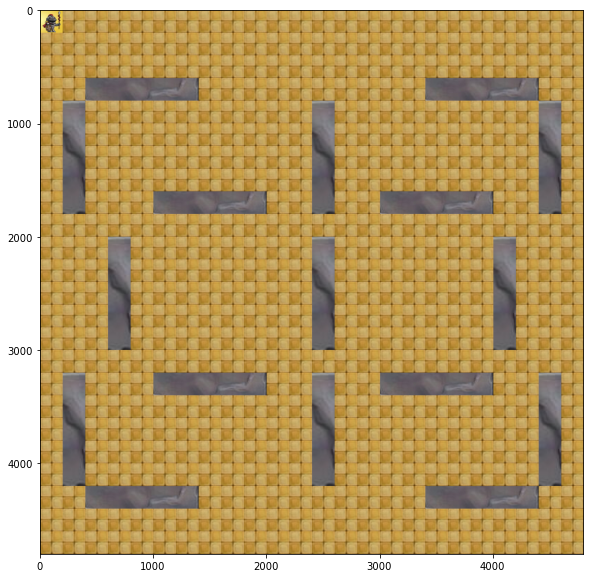

In [2]:
m.Create_character(c)
m.printMap()

In [52]:

moving(m,c)
encounter(c,cc)
c.show_status()

Please enter a movement W,A,S,D,E: D
You found a Goodie! Select from 1) Torch, 2) Archor, 3) Armor.2
Now you have a archor in your hand, congratulations!
Your Status
Attack =  5
HP =  100


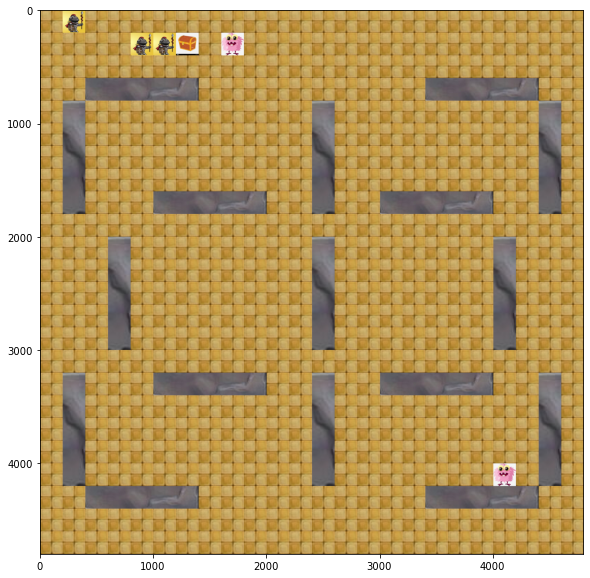

In [50]:
m.Create_character(c)
m.printMap()

In [49]:
cc = Monster(1,6,"big king",0)
m.Create_Monster(cc)